In [28]:
#Importing the libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import six
import sys
sys.modules['sklearn.externals.six'] = six
import warnings
warnings.filterwarnings(action="ignore",category=FutureWarning)

In [11]:
pd.options.display.float_format="{:,.2f}".format

In [5]:
#Loading the dataset
df = pd.read_csv("data/churn.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
#Dropping the columns that do not add value
df = df.drop(df.columns[0:3], axis=1)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
df.shape

(10000, 11)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [9]:
#Finding the categorical features and the amount of different values the have

categorical=df.select_dtypes(include="object").columns

for line in categorical:
    print("The feature " + line + " contains" ,  str(len(df[line].unique())) ," distinct values ")

The feature Geography contains 3  distinct values 
The feature Gender contains 2  distinct values 


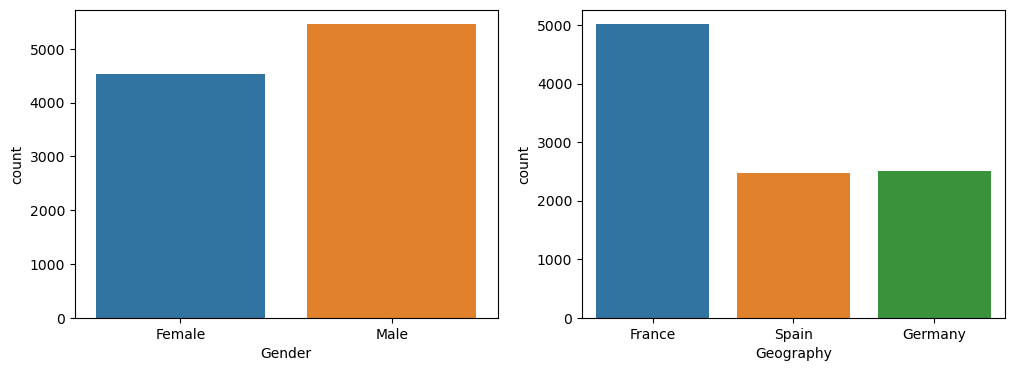

In [10]:
#Analyzing the distributions of the categorical features

f,axes=plt.subplots(1,2,figsize=(12,4))

sns.countplot(df["Gender"],ax=axes[0]);
sns.countplot(df['Geography'],ax=axes[1]);

In [11]:
#Creating new features with the help of get_dummies

for column in categorical:
    nuevas_features = pd.get_dummies(df[column])
    df= pd.merge(
        left=df,
        right=nuevas_features,
        left_index=True,
        right_index=True,
    )
    df = df.drop(columns=column)

In [12]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,France,Germany,Spain,Female,Male
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0


In [13]:
#Defining X and y
X=df.drop(columns=["Exited"])
y=df[["Exited"]]

In [14]:
#Finding the percentage of each class
(y.value_counts()/y.shape[0])*100

Exited
0         79.63
1         20.37
dtype: float64

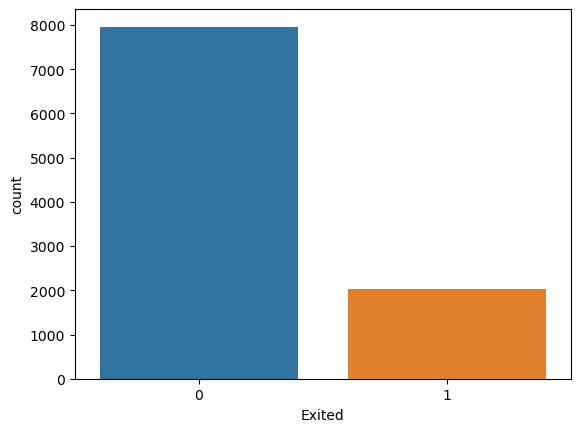

In [15]:
sns.countplot(data=df,x="Exited");

In [16]:
#Managing the imbalanced classes with imblearn

from imblearn.combine import SMOTEENN

imp=SMOTEENN(sampling_strategy=0.99)

X_bal,y_bal=imp.fit_resample(X,y)

#Finding out if the imbalaced data continues

y_bal.value_counts(normalize=True)*100

Exited
1         55.046584
0         44.953416
dtype: float64

In [17]:
#Saving the new data in order to save time in the future analysis

new_data=pd.concat([X_bal,y_bal],axis=1)

new_data.to_csv("new_data_churn_lab_platzi.csv",index=False)

In [18]:
#Splitting the data in train and test

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X_bal,y_bal,test_size=0.3, random_state=42)

In [19]:
#Standardization the data

from sklearn.preprocessing import StandardScaler

scaler_x=StandardScaler()

scaler_x.fit(X_train)

X_train=pd.DataFrame(scaler_x.transform(X_train),columns=X_train.columns)

X_test=pd.DataFrame(scaler_x.transform(X_test),columns=X_test.columns)

In [60]:
#EVALUATING DIFFERENT MACHINE LEARNING MODELS

#Importing the libraries
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

#Ensemble
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier,ExtraTreesClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier,VotingClassifier
from mlxtend import classifier

#Estimators for voting
estimators_voting=[("lr",LogisticRegression(solver="lbfgs",max_iter=10000)),("knn",KNeighborsClassifier(5)),("rfc",RandomForestClassifier())]

#Estimators for stacking
# Prepare the list of tuples with the first-layer classifiers
classifiers = [('clf_dt',DecisionTreeClassifier(min_samples_leaf= 3 , min_samples_split= 9, random_state=500)),('clf_knn',KNeighborsClassifier(n_neighbors=5,algorithm= 'ball_tree'))]
# Instantiate the second-layer meta estimator
clf_meta = LogisticRegression()


#Estimators for MLxtend
# Instantiate the first-layer classifiers
clf_dt = DecisionTreeClassifier(min_samples_leaf = 3 , min_samples_split = 9, random_state=500)
clf_knn = KNeighborsClassifier(n_neighbors=5,algorithm= 'ball_tree')

# Instantiate the second-layer meta classifier
clf_meta = LogisticRegression()


In [61]:
#Preparing the models
models=[]
models.append(("Logistic Regression",LogisticRegression(solver="lbfgs",max_iter=10000)))
models.append(("LDA",LinearDiscriminantAnalysis()))
models.append(("Naive Bayes",GaussianNB()))
models.append(("SVM",SVC()))
models.append(("KNN",KNeighborsClassifier()))
models.append(("Decision Tree",DecisionTreeClassifier()))
models.append(("XGB Classifier",XGBClassifier(objective="binary:logistic")))
models.append(("Cat Boost Classifier",CatBoostClassifier(n_estimators =100,learning_rate=0.1, max_depth=3, random_state=500,verbose=0)))
models.append(("LGBM Classifier",LGBMClassifier(max_depth = 3, learning_rate = 0.1, n_estimators = 10, objective='binary', seed=500,verbose=0,force_row_wise=True)))
models.append(("Random Forest",RandomForestClassifier()))
models.append(("Bagging Class",BaggingClassifier()))
models.append(("Extra trees",ExtraTreesClassifier()))
models.append(("Ada Boost",AdaBoostClassifier()))
models.append(("Gradient Boosting",GradientBoostingClassifier()))
models.append(("Voting Classifier",VotingClassifier(estimators_voting)))
models.append(("Average Voting Classifier",VotingClassifier(estimators_voting,voting="soft")))
models.append(("Stacking Classifier",StackingClassifier(classifiers,clf_meta,stack_method='predict_proba',passthrough = False)))
models.append(("MLXTend Classifier",classifier.StackingClassifier([clf_dt,clf_knn],clf_meta,use_probas=True,use_features_in_secondary = False)))

#Evaluating each model in turn
results=[]
names=[]
scoring="accuracy"
scaler=StandardScaler()

for name, model in models:
  kfold=KFold(n_splits=10,shuffle=True)
  cv_results=cross_val_score(model,X_train,y_train.values.reshape(-1,1).ravel(),cv=kfold,scoring=scoring)
  results.append(cv_results)
  names.append(name)
  print(f"{name} :{cv_results.mean()*100:,.2f}% ({cv_results.std()*100:.2f}%)")

Logistic Regression :84.36% (1.76%)
LDA :83.65% (1.37%)
Naive Bayes :80.83% (1.88%)
SVM :87.80% (1.81%)
KNN :85.87% (1.11%)
Decision Tree :83.81% (1.53%)
XGB Classifier :90.24% (1.57%)
Cat Boost Classifier :88.27% (1.39%)
LGBM Classifier :85.36% (0.45%)
Random Forest :89.46% (1.13%)
Bagging Class :87.31% (1.51%)
Extra trees :89.06% (0.95%)
Ada Boost :87.80% (1.38%)
Gradient Boosting :89.62% (1.58%)
Voting Classifier :88.07% (1.51%)
Average Voting Classifier :88.33% (1.84%)
Stacking Classifier :86.89% (1.57%)
MLXTend Classifier :85.12% (1.47%)


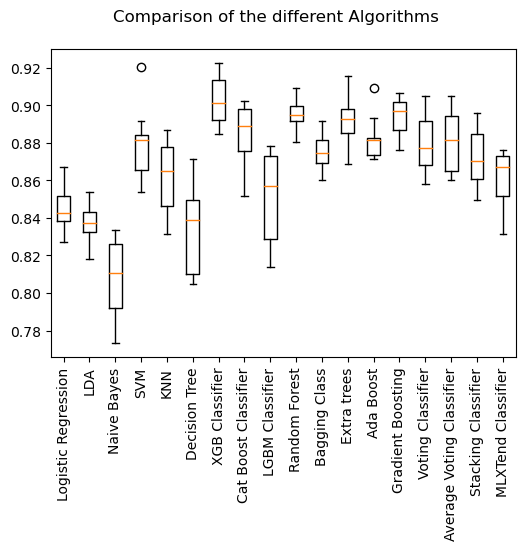

In [59]:
import matplotlib.pyplot as plt
fig=plt.figure()
fig.suptitle("Comparison of the different Algorithms")
ax=fig.add_subplot(111)
plt.rcParams["figure.figsize"]=[6,10]
plt.boxplot(results)
ax.set_xticklabels(names,rotation="vertical")
plt.show()

In [26]:
from tpot import TPOTClassifier
# Assign the values outlined to the inputs
number_generations = 3
population_size = 4
offspring_size = 3
scoring_function = 'accuracy'

# Create the tpot classifier
tpot_clf = TPOTClassifier(generations=number_generations, population_size=population_size,
                          offspring_size=offspring_size, scoring=scoring_function,
                          verbosity=2, random_state=2, cv=2)

# Fit the classifier to the training data
tpot_clf.fit(X_train , y_train.values.ravel())
print("="*30)
# Score on the test set
print("Score for the best classifier",tpot_clf.score(X_test , y_test.values.ravel()))

                                                                                                                       
Generation 1 - Current best internal CV score: 0.843611357586513
                                                                                                                       
Generation 2 - Current best internal CV score: 0.8456078083407276
                                                                                                                       
Generation 3 - Current best internal CV score: 0.888642413487134
                                                                                                                       
Best pipeline: XGBClassifier(input_matrix, learning_rate=0.5, max_depth=2, min_child_weight=4, n_estimators=100, n_jobs=1, subsample=0.9500000000000001, verbosity=0)
Score for the best classifier 0.900103519668737


In [62]:
#Fine Tuning the best model

from sklearn.model_selection import GridSearchCV


parametros = {
    'n_estimators': range(5,20),
    'max_depth': range(2, 12)
}
  
model=XGBClassifier(objective="binary:logistic")

kfold=KFold(n_splits=5,shuffle=True)

grid_result=GridSearchCV(estimator=model,param_grid=parametros,cv=kfold)

grid_result.fit(X_train,(y_train.values.reshape(-1,1)).ravel())

#Summarize_results

print("Best : %f using the params %s" % (grid_result.best_score_ , grid_result.best_params_))

means=grid_result.cv_results_["mean_test_score"]
stds=grid_result.cv_results_["std_test_score"]
params=grid_result.cv_results_["params"]


for mean,stdev,param in zip(means,stds,params):
    
  print("%f (%f) with %r" % (mean,stdev,param))

Best : 0.892192 using the params {'max_depth': 6, 'n_estimators': 19}
0.836524 (0.021270) with {'max_depth': 2, 'n_estimators': 5}
0.845612 (0.012741) with {'max_depth': 2, 'n_estimators': 6}
0.844502 (0.014959) with {'max_depth': 2, 'n_estimators': 7}
0.850492 (0.014257) with {'max_depth': 2, 'n_estimators': 8}
0.854931 (0.014640) with {'max_depth': 2, 'n_estimators': 9}
0.854487 (0.018501) with {'max_depth': 2, 'n_estimators': 10}
0.854928 (0.015808) with {'max_depth': 2, 'n_estimators': 11}
0.856479 (0.014188) with {'max_depth': 2, 'n_estimators': 12}
0.860916 (0.013475) with {'max_depth': 2, 'n_estimators': 13}
0.858919 (0.013224) with {'max_depth': 2, 'n_estimators': 14}
0.862246 (0.010879) with {'max_depth': 2, 'n_estimators': 15}
0.861581 (0.012899) with {'max_depth': 2, 'n_estimators': 16}
0.864464 (0.013536) with {'max_depth': 2, 'n_estimators': 17}
0.865131 (0.012453) with {'max_depth': 2, 'n_estimators': 18}
0.870453 (0.012522) with {'max_depth': 2, 'n_estimators': 19}
0.855

In [63]:
results=pd.DataFrame(list(zip(means,stds,params)))
results.columns=["Accuracy","Std","Parameters"]
results

,Accuracy,Std,Parameters
0,0.836524,0.021270,"{'max_depth': 2, 'n_estimators': 5}"
1,0.845612,0.012741,"{'max_depth': 2, 'n_estimators': 6}"
2,0.844502,0.014959,"{'max_depth': 2, 'n_estimators': 7}"
3,0.850492,0.014257,"{'max_depth': 2, 'n_estimators': 8}"
4,0.854931,0.014640,"{'max_depth': 2, 'n_estimators': 9}"
...,...,...,...
145,0.886648,0.006746,"{'max_depth': 11, 'n_estimators': 15}"
146,0.886647,0.005247,"{'max_depth': 11, 'n_estimators': 16}"
147,0.887756,0.005199,"{'max_depth': 11, 'n_estimators': 17}"
148,0.888865,0.004812,"{'max_depth': 11, 'n_estimators': 18}"


In [64]:
#Playing with CV in XGBoost

from xgboost import cv

from xgboost import DMatrix

matrix=DMatrix(X_train,y_train)

params = {"objective":"binary:logistic", "max_depth":3}


# Perform cross-validation: cv_results
cv_results = cv(dtrain=matrix, params=params, 
                  nfold=3, num_boost_round=10, 
                  metrics="auc", as_pandas=True, seed=123)


# Print cv_results
print(cv_results)

print("*"*20)

# Print the AUC
print("ROC_AUC with XGBoostCV")
print(((cv_results["test-auc-mean"].iloc[-1])))

print("*"*20)

#CV with sk-learn
cv_sklearn=cross_val_score(XGBClassifier(objective="binary:logistic",max_depth=3),X_train,y_train.values.reshape(-1,1).ravel(),cv=kfold,scoring="roc_auc").mean()

print("ROC_AUC with sk-learn",cv_sklearn)

   train-auc-mean  train-auc-std  test-auc-mean  test-auc-std
0        0.838921       0.005347       0.829254      0.012003
1        0.907429       0.003242       0.900237      0.009928
2        0.926732       0.007319       0.918359      0.008989
3        0.934867       0.005077       0.927848      0.010182
4        0.940230       0.002411       0.934273      0.006777
5        0.942543       0.001712       0.934852      0.007086
6        0.947070       0.001399       0.938351      0.005478
7        0.949440       0.002247       0.941040      0.003950
8        0.950361       0.001804       0.941866      0.004943
9        0.951990       0.001591       0.942849      0.004587
********************
ROC_AUC with XGBoostCV
0.942848750252074
********************
ROC_AUC with sk-learn 0.9646706553923872


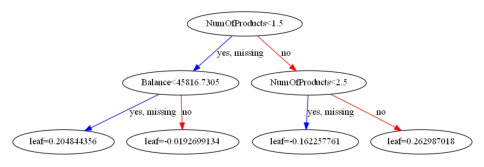

<Figure size 1000x600 with 0 Axes>

In [65]:
# Create the DMatrix: housing_dmatrix
import xgboost as xgb
matrix = xgb.DMatrix(data=X, label=y)

# Create the parameter dictionary: params
params = {"objective":"binary:logistic", "max_depth":2}

# Train the model: xg_reg
xg_cla = xgb.train(params=params, dtrain=matrix, num_boost_round=10)

# Plot the first tree
xgb.plot_tree(xg_cla,num_trees=9)
plt.figure(figsize=(10,6))
plt.show();


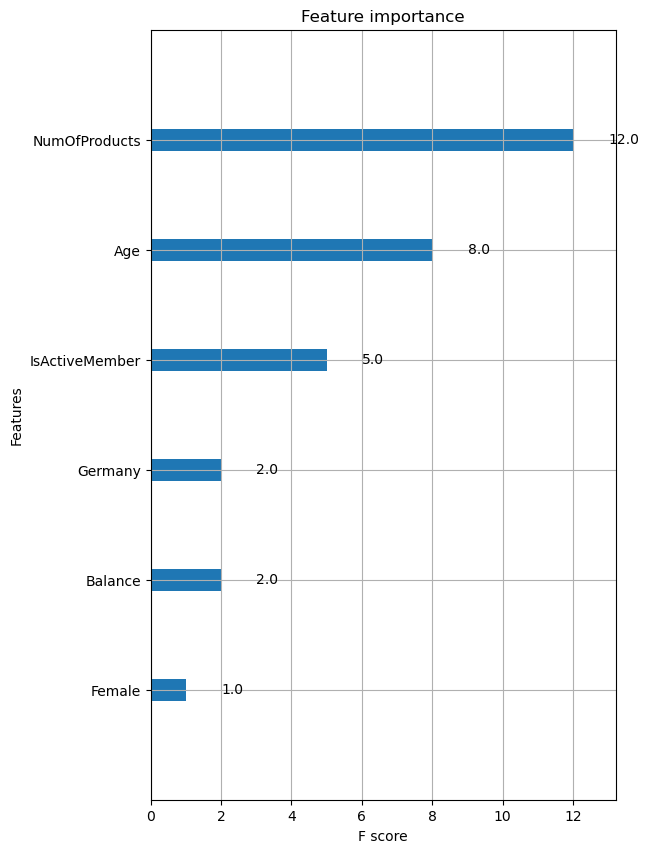

In [66]:
# Plot the feature importances
xgb.plot_importance(xg_cla)
plt.rcParams["figure.figsize"]=[5,2]
plt.show()

In [67]:
#Saving the fine_tuned model
from pickle import dump
dump(grid_result,open("Models_Jupyter_Notebook/tune_model_lab_platzi.pkl","wb"))

In [68]:
#Saving the scaler
from pickle import dump
dump(scaler_x,open("Models_Jupyter_Notebook/scaler_x.pkl","wb"))

In [69]:
#Evaluating the model using classification_report

from sklearn.metrics import classification_report

y_pred=pd.DataFrame(grid_result.predict(X_test).reshape(-1,1),columns=y_test.columns)

clas_rep=classification_report(y_test,y_pred)

print("Classification Report:")
print(clas_rep)

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.90      0.89       877
           1       0.92      0.90      0.91      1055

    accuracy                           0.90      1932
   macro avg       0.90      0.90      0.90      1932
weighted avg       0.90      0.90      0.90      1932



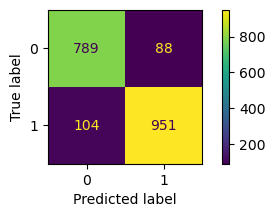

In [70]:
#Evaluating the model with a confusion matrix
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(grid_result,X_test,y_test.values.reshape(-1,1).ravel());

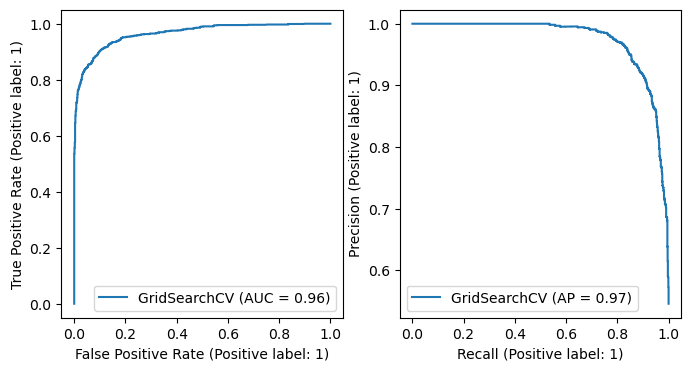

In [71]:
#Using precision_recall curve and roc_curve

from sklearn.metrics import plot_precision_recall_curve,plot_roc_curve

fig,ax=plt.subplots(1,2,figsize=(8,4));

plot_roc_curve(grid_result,X_test,y_test.values.reshape(-1,1).ravel(),ax=ax[0]);

plot_precision_recall_curve(grid_result,X_test,y_test.values.reshape(-1,1).ravel(),ax=ax[1]);

In [73]:
#SOLVING THE PROBLEM WITH GENETIC ALGORITHMS
from tpot import TPOTClassifier
# Assign the values outlined to the inputs
number_generations = 3
population_size = 4
offspring_size = 3
scoring_function = 'accuracy'

# Create the tpot classifier
tpot_clf = TPOTClassifier(generations=number_generations, population_size=population_size,
                          offspring_size=offspring_size, scoring=scoring_function,
                          verbosity=2, random_state=2, cv=2)

# Fit the classifier to the training data
tpot_clf.fit(X_train , y_train.values.ravel())
print("="*30)
# Score on the test set
print("Score of the best classifier",tpot_clf.score(X_test , y_test.values.ravel()))


                                                                                                                       
Generation 1 - Current best internal CV score: 0.843611357586513
                                                                                                                       
Generation 2 - Current best internal CV score: 0.8456078083407276
                                                                                                                       
Generation 3 - Current best internal CV score: 0.888642413487134
                                                                                                                       
Best pipeline: XGBClassifier(input_matrix, learning_rate=0.5, max_depth=2, min_child_weight=4, n_estimators=100, n_jobs=1, subsample=0.9500000000000001, verbosity=0)
Score of the best classifier 0.900103519668737


In [77]:
#SOLVING THE PROBLEM WITH ARTIFICIAL NEURAL NETWORKS

In [78]:
#Importing the libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

In [79]:
early=EarlyStopping(monitor="val_accuracy", patience=10)

In [80]:
#Creating the model
model=Sequential()
model.add(Dense(256,activation="relu",input_dim=X_train.shape[1]))
model.add(Dense(128,activation="relu"))
model.add(Dense(32,activation="relu"))
model.add(Dense(1,activation="sigmoid"))
model.compile(optimizer="adam",metrics="accuracy",loss="binary_crossentropy")
history=model.fit(X_train,y_train,epochs=200,batch_size=16,validation_split=0.2,callbacks=[early])

Epoch 1/200
226/226 [==============================] - 2s 5ms/step - loss: 0.3656 - accuracy: 0.8347 - val_loss: 0.3325 - val_accuracy: 0.8337
Epoch 2/200
226/226 [==============================] - 1s 3ms/step - loss: 0.2779 - accuracy: 0.8716 - val_loss: 0.3142 - val_accuracy: 0.8514
Epoch 3/200
226/226 [==============================] - 1s 3ms/step - loss: 0.2639 - accuracy: 0.8791 - val_loss: 0.3318 - val_accuracy: 0.8459
Epoch 4/200
226/226 [==============================] - 1s 3ms/step - loss: 0.2492 - accuracy: 0.8907 - val_loss: 0.3121 - val_accuracy: 0.8559
Epoch 5/200
226/226 [==============================] - 1s 3ms/step - loss: 0.2372 - accuracy: 0.8982 - val_loss: 0.3054 - val_accuracy: 0.8647
Epoch 6/200
226/226 [==============================] - 1s 3ms/step - loss: 0.2313 - accuracy: 0.9040 - val_loss: 0.3329 - val_accuracy: 0.8537
Epoch 7/200
226/226 [==============================] - 1s 3ms/step - loss: 0.2294 - accuracy: 0.9010 - val_loss: 0.3188 - val_accuracy: 0.8514

In [81]:
#Evaluating the model
model.evaluate(X_test,y_test,verbose=0)

[0.566441535949707, 0.8861283659934998]

In [82]:
##Using CV Score
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

def model_function():
    model=Sequential()
    model.add(Dense(256,activation="relu",input_dim=X_train.shape[1]))
    model.add(Dense(128,activation="relu"))
    model.add(Dense(32,activation="relu"))
    model.add(Dense(1,activation="sigmoid"))
    model.compile(optimizer="adam",metrics="accuracy",loss="binary_crossentropy")
    return model

modelo=KerasClassifier(build_fn=model_function,epochs=20,batch_size=16,verbose=0)


cv=cross_val_score(modelo,X_train,y_train,cv=5)

print("Mean_test_accuracy",cv.mean())

Mean_test_accuracy 0.8693427681922913


In [83]:
##Tuning hyperparameters

from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score,RandomizedSearchCV

def model_function(optimizer="adam",activation="relu"):
    model=Sequential()
    model.add(Dense(256,activation=activation,input_dim=X_train.shape[1]))
    model.add(Dense(128,activation=activation))
    model.add(Dense(64,activation=activation))
    model.add(Dense(1,activation="sigmoid"))
    model.compile(optimizer=optimizer,loss="binary_crossentropy",metrics="accuracy")
    return model

modelo=KerasClassifier(build_fn=model_function,epochs=3,batch_size=16,verbose=0)

parameters={
    "optimizer":["adam","sgd","rmsprop"],
    "activation":["relu","sigmoid"],
    "epochs":[10,20,40],
    "batch_size":[16,32,64]
}

random=RandomizedSearchCV(modelo,param_distributions=parameters,cv=3)

results=random.fit(X_train,y_train)

print("Best Score", results.best_score_)
print("="*30)
print("Best Parameters" , results.best_params_)

Best Score 0.8768847982088724
Best Parameters {'optimizer': 'sgd', 'epochs': 40, 'batch_size': 32, 'activation': 'relu'}


In [84]:
##Tuning layers and neurons

from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score,RandomizedSearchCV

def model_function_2(dense_layers_extra=2,nn=100):
    model=Sequential()
    model.add(Dense(units=nn,activation="relu",input_dim=X_train.shape[1]))
    
    for i in range(1,dense_layers_extra+1):
        model.add(Dense(units=nn, activation="relu"))
        
    model.compile(optimizer="adam",loss="binary_crossentropy",metrics="accuracy")
    
    model.add(Dense(1,activation="sigmoid"))
    
    return model

modelo=KerasClassifier(build_fn=model_function_2,epochs=3,batch_size=16,verbose=0)

parameters={
    "dense_layers_extra":[1,2,3,4],
    
    "nn":[32,64,128,256]
}

random=RandomizedSearchCV(modelo,param_distributions=parameters,cv=3)

results=random.fit(X_train,y_train)

print("Best Score", results.best_score_)
print("="*30)
print("Best Parameters" , results.best_params_)

Best Score 0.8715615073839823
Best Parameters {'nn': 128, 'dense_layers_extra': 2}


In [89]:
#Creating the model with the best parameters
model=Sequential()
model.add(Dense(256,activation="relu",input_dim=X_train.shape[1]))
model.add(Dense(128,activation="relu"))
model.add(Dense(32,activation="relu"))
model.add(Dense(1,activation="sigmoid"))
model.compile(optimizer="sgd",metrics="accuracy",loss="binary_crossentropy")
history=model.fit(X_train,y_train,epochs=40,batch_size=32,validation_split=0.2)

Epoch 1/40
113/113 [==============================] - 2s 7ms/step - loss: 0.6528 - accuracy: 0.6525 - val_loss: 0.6009 - val_accuracy: 0.7672
Epoch 2/40
113/113 [==============================] - 0s 3ms/step - loss: 0.5348 - accuracy: 0.8048 - val_loss: 0.4993 - val_accuracy: 0.7982
Epoch 3/40
113/113 [==============================] - 0s 3ms/step - loss: 0.4460 - accuracy: 0.8292 - val_loss: 0.4348 - val_accuracy: 0.8126
Epoch 4/40
113/113 [==============================] - 0s 3ms/step - loss: 0.3935 - accuracy: 0.8383 - val_loss: 0.3999 - val_accuracy: 0.8193
Epoch 5/40
113/113 [==============================] - 0s 4ms/step - loss: 0.3631 - accuracy: 0.8436 - val_loss: 0.3776 - val_accuracy: 0.8237
Epoch 6/40
113/113 [==============================] - 0s 3ms/step - loss: 0.3430 - accuracy: 0.8497 - val_loss: 0.3616 - val_accuracy: 0.8326
Epoch 7/40
113/113 [==============================] - 0s 3ms/step - loss: 0.3279 - accuracy: 0.8561 - val_loss: 0.3528 - val_accuracy: 0.8293
Epoch 

In [90]:
#Evaluating the best model
model.evaluate(X_test,y_test,verbose=0)

[0.2520904839038849, 0.8887163400650024]

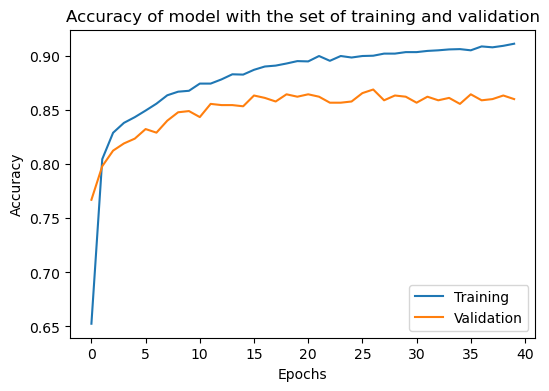

In [91]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(6,4))
plt.plot(history.history["accuracy"]);
plt.plot(history.history["val_accuracy"])
plt.title("Accuracy of model with the set of training and validation")
plt.xlabel("Epochs");
plt.ylabel("Accuracy");
plt.legend(["Training","Validation"],loc="lower right");

In [92]:
#Evaluating the model using classification_report

from sklearn.metrics import classification_report

y_pred=model.predict(X_test,verbose=0).round()

clas_rep=classification_report(y_test,y_pred)

print("Classification Report:")

print(clas_rep)

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.89      0.88       877
           1       0.90      0.89      0.90      1055

    accuracy                           0.89      1932
   macro avg       0.89      0.89      0.89      1932
weighted avg       0.89      0.89      0.89      1932



In [93]:
class estimator:
  _estimator_type = ''
  classes_=[]
  def __init__(self, model, classes):
    self.model = model
    self._estimator_type = 'classifier'
    self.classes_ = classes
  def predict(self, X):
    y_prob= self.model.predict(X)
    y_pred = y_prob.round()
    return y_pred

classifier = estimator(model,[0,1])

61/61 [==============================] - 0s 2ms/step


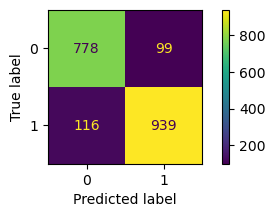

In [94]:
plot_confusion_matrix(classifier,X_test,y_test);